<a href="https://colab.research.google.com/github/sruthib22/Projects/blob/main/DATA602_ML/602_Group_1_project_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group - 1 Project

Project Title: Prediction model by the utilization of distinctive features of patients with thyroid disease

Members: 

Sruthi Batchala          OH34738@umbc.edu 

Saathyak Rao Kasuganti   FV86010@umbc.edu

Avanti Dasre             avantid1@umbc.edu

Luis Daniel Galvan       ZN16373@umbc.edu 


In [ ]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import spearmanr  
import numpy as np 
import mlxtend


In [ ]:
df = pd.read_csv('thyroid.dat')

In [ ]:
df.head()

,Age,Sex,On_thyroxine,Query_on_thyroxine,On_antithyroid_medication,Sick,Pregnant,Thyroid_surgery,I131_treatment,Query_hypothyroid,...,Goitre,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI,Class
0,0.73,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0.00060,0.015,0.120,0.082,0.146,3
1,0.24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.030,0.143,0.133,0.108,3
2,0.47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00190,0.024,0.102,0.131,0.078,3
3,0.64,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00090,0.017,0.077,0.090,0.085,3
4,0.23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.026,0.139,0.090,0.153,3


#### Performing EDA 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        7200 non-null   float64
 1   Sex                        7200 non-null   int64  
 2   On_thyroxine               7200 non-null   int64  
 3   Query_on_thyroxine         7200 non-null   int64  
 4   On_antithyroid_medication  7200 non-null   int64  
 5   Sick                       7200 non-null   int64  
 6   Pregnant                   7200 non-null   int64  
 7   Thyroid_surgery            7200 non-null   int64  
 8   I131_treatment             7200 non-null   int64  
 9   Query_hypothyroid          7200 non-null   int64  
 10  Query_hyperthyroid         7200 non-null   int64  
 11  Lithium                    7200 non-null   int64  
 12  Goitre                     7200 non-null   int64  
 13  Tumor                      7200 non-null   int64

In [ ]:
df.shape

(7200, 22)

In [ ]:
df.describe()

,Age,Sex,On_thyroxine,Query_on_thyroxine,On_antithyroid_medication,Sick,Pregnant,Thyroid_surgery,I131_treatment,Query_hypothyroid,...,Goitre,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI,Class
count,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,...,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000
mean,0.520518,0.304306,0.130556,0.015417,0.012778,0.038333,0.010833,0.014028,0.016806,0.065556,...,0.008194,0.025556,0.000139,0.048889,0.004861,0.019977,0.109430,0.097838,0.113215,2.902778
std,0.189269,0.460145,0.336937,0.123212,0.112322,0.192013,0.103525,0.117613,0.128551,0.247521,...,0.090158,0.157816,0.011785,0.215651,0.022979,0.007539,0.035969,0.019085,0.036098,0.365923
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000500,0.002000,0.017000,0.002000,1.000000
25%,0.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000710,0.017000,0.089000,0.087000,0.095000,3.000000
50%,0.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.001700,0.020100,0.107000,0.097000,0.111000,3.000000
75%,0.670000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.002700,0.022000,0.125000,0.104000,0.127000,3.000000
max,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.530000,0.180000,0.600000,0.233000,0.642000,3.000000


In [ ]:
#checking for duplicates
df.duplicated().sum()

71

In [ ]:
# checking all the duplicates rows in the dataset 
df.loc[df.duplicated(), :]

,Age,Sex,On_thyroxine,Query_on_thyroxine,On_antithyroid_medication,Sick,Pregnant,Thyroid_surgery,I131_treatment,Query_hypothyroid,...,Goitre,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI,Class
244,0.35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00189,0.0206,0.11118,0.099,0.11207,3
292,0.32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00189,0.0206,0.11118,0.099,0.11207,3
303,0.26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00189,0.0206,0.11118,0.099,0.11207,3
349,0.32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00189,0.0206,0.11118,0.099,0.11207,3
375,0.32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00189,0.0206,0.11118,0.099,0.11207,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6737,0.65,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00189,0.0206,0.11118,0.099,0.11207,3
6944,0.26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00232,0.0201,0.11329,0.096,0.11776,3
7013,0.34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00232,0.0201,0.11329,0.096,0.11776,3
7121,0.50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00232,0.0201,0.11329,0.096,0.11776,3


In [ ]:
#dropping the duplicates
df = df.drop_duplicates()

In [ ]:
df.shape

(7129, 22)

In [ ]:
#Find null values

df.isnull().sum()

Age                          0
Sex                          0
On_thyroxine                 0
Query_on_thyroxine           0
On_antithyroid_medication    0
Sick                         0
Pregnant                     0
Thyroid_surgery              0
I131_treatment               0
Query_hypothyroid            0
Query_hyperthyroid           0
Lithium                      0
Goitre                       0
Tumor                        0
Hypopituitary                0
Psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Class                        0
dtype: int64

In [ ]:
#checking the datatypes
df.dtypes

Age                          float64
Sex                            int64
On_thyroxine                   int64
Query_on_thyroxine             int64
On_antithyroid_medication      int64
Sick                           int64
Pregnant                       int64
Thyroid_surgery                int64
I131_treatment                 int64
Query_hypothyroid              int64
Query_hyperthyroid             int64
Lithium                        int64
Goitre                         int64
Tumor                          int64
Hypopituitary                  int64
Psych                          int64
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
Class                          int64
dtype: object

In [ ]:
#changing the datatype of age
df['Age'] = df['Age'] * 100
df['Age'] = df['Age'].astype(int)

In [ ]:
# to find the number of values for each class i.e target
df['Class'].value_counts()

3    6595
2     368
1     166
Name: Class, dtype: int64

In [ ]:
#check for balance or unbalanced case
print('The number of samples with Hyper-thyroidism =', len(df[df['Class']==1]), '\n')
print('The number of samples with Hypo-thyroidism =', len(df[df['Class']==2]), '\n')
print('The number of samples with Negative case of Thyroidism =', len(df[df['Class']==3]))

The number of samples with Hyper-thyroidism = 166 

The number of samples with Hypo-thyroidism = 368 

The number of samples with Negative case of Thyroidism = 6595


### In this case, the dataset is very close to the unbalanced side.

In [ ]:
dfi = df[['TT4', 'T4U', 'FTI','Age','TSH','T3']].copy()

In [ ]:
dfi.head()

,TT4,T4U,FTI,Age,TSH,T3
0,0.120,0.082,0.146,73,0.00060,0.015
1,0.143,0.133,0.108,24,0.00025,0.030
2,0.102,0.131,0.078,47,0.00190,0.024
3,0.077,0.090,0.085,64,0.00090,0.017
4,0.139,0.090,0.153,23,0.00025,0.026


In [ ]:
dfi = dfi[dfi.TT4 != '?']
dfi = dfi[dfi.T4U != '?']
dfi = dfi[dfi.FTI != '?']
dfi = dfi[dfi.Age != '?']
dfi = dfi[dfi.TSH != '?']
dfi = dfi[dfi.T3 != '?']

In [ ]:
#dropping all null values
dfi = dfi.dropna() 

In [ ]:
dfi["TT4"] = pd.to_numeric(dfi.TT4, errors='coerce')
dfi["T4U"] = pd.to_numeric(dfi.T4U, errors='coerce')
dfi["FTI"] = pd.to_numeric(dfi.FTI, errors='coerce')
dfi["Age"] = pd.to_numeric(dfi.Age, errors='coerce')
dfi["TSH"] = pd.to_numeric(dfi.TSH, errors='coerce')
dfi["T3"] = pd.to_numeric(dfi.T3, errors='coerce')

In [ ]:
dfi.reset_index(drop=True)

,TT4,T4U,FTI,Age,TSH,T3
0,0.120,0.082,0.146,73,0.00060,0.0150
1,0.143,0.133,0.108,24,0.00025,0.0300
2,0.102,0.131,0.078,47,0.00190,0.0240
3,0.077,0.090,0.085,64,0.00090,0.0170
4,0.139,0.090,0.153,23,0.00025,0.0260
...,...,...,...,...,...,...
7124,0.090,0.080,0.113,35,0.00068,0.0200
7125,0.090,0.082,0.110,27,0.00150,0.0201
7126,0.080,0.075,0.107,26,0.00100,0.0201
7127,0.098,0.091,0.108,95,0.00160,0.0201


In [ ]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7129 entries, 0 to 7199
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TT4     7129 non-null   float64
 1   T4U     7129 non-null   float64
 2   FTI     7129 non-null   float64
 3   Age     7129 non-null   int32  
 4   TSH     7129 non-null   float64
 5   T3      7129 non-null   float64
dtypes: float64(5), int32(1)
memory usage: 362.0 KB


### Finding the correlations between the continuous variables for feature selection

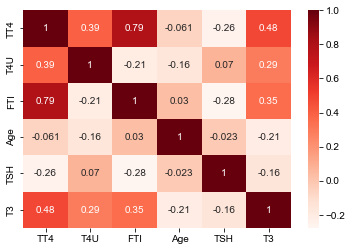

In [ ]:
cor_marix = dfi.corr()
sns.heatmap(cor_marix, annot=True, cmap = 'Reds')
sns.set(rc = {'figure.figsize':(15,10)})
plt.show()

In [ ]:
cols = dfi.columns  
for col in cols[:-1]:
    rho, p = spearmanr(dfi[col].values, dfi['TT4'].values)
    print('The Calculated Spearman correlation between TT4 and %s is %s' %(col, round(rho, 4)))

The Calculated Spearman correlation between TT4 and TT4 is 1.0
The Calculated Spearman correlation between TT4 and T4U is 0.3988
The Calculated Spearman correlation between TT4 and FTI is 0.7371
The Calculated Spearman correlation between TT4 and Age is -0.0457
The Calculated Spearman correlation between TT4 and TSH is -0.3114


### Based on the correlations of variables to TT4 values, 3 features "T3", "FTI" and "T4U" are selected for performing regression analysis. 

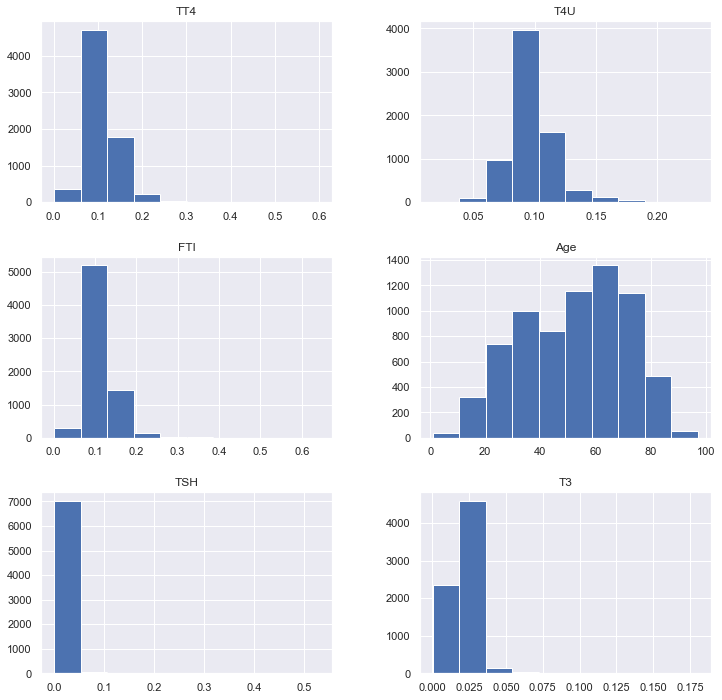

In [ ]:
dfi.hist(figsize=(12,12))
plt.show()

In [ ]:
# split data into 2 subsets to train and test.
dfr= dfi[['T3', 'FTI', 'T4U']].copy()
X = dfi[['T3', 'FTI', 'T4U']] 
y = dfi.TT4            
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [ ]:
# Importing 'LinearRegression' through linear_model module

from sklearn.linear_model import LinearRegression  
#performing linear regression.
reg = LinearRegression()         # Instantiate
reg.fit(X_train, y_train)        # Fit the train data

LinearRegression()

In [ ]:
 # Calculating R^2 score for train
r2_train_score = reg.score(X_train, y_train)  

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('Coefficients of Linear Model:', reg.coef_, '\n')
print('Intercept:', reg.intercept_)

R^2 score for train dataset =  0.9546 

Coefficients of Linear Model: [0.01243381 0.93434909 1.09568396] 

Intercept: -0.10373228541861375


In [ ]:
# calculating the predictions

y_pred = reg.predict(X_test)
y_pred[:20]  # show predictions of first 20 data points in test dataset

array([0.07438993, 0.11358467, 0.11855422, 0.17717986, 0.13992661,
       0.12150798, 0.1311244 , 0.1373178 , 0.57176874, 0.09616657,
       0.1225303 , 0.22953099, 0.22020634, 0.10914856, 0.10212775,
       0.08698104, 0.10900081, 0.10297422, 0.13720388, 0.09175714])

In [ ]:
# calculate performance of the model for test subset and Calculating R^2 score for train
r2_test_score = reg.score(X_test, y_test)  
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for test dataset =  0.9179 



###### It can be infered that the model has learnt pretty well.

### Scatter-plot for linear regression:

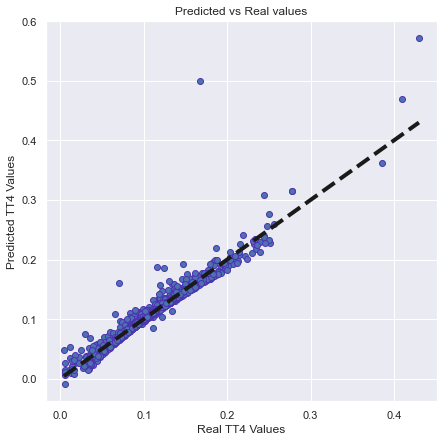

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred, edgecolors=(0.3, 0.2, 0.7))  # Scatter plot for predictions vs truth
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Draw line y=x

ax.set_xlabel('Real TT4 Values')
ax.set_ylabel('Predicted TT4 Values')
plt.title('Predicted vs Real values', fontdict=None, loc='center')
plt.show()

### Decision tree - regressor :

In [ ]:
from sklearn import tree 

tr_reg = tree.DecisionTreeRegressor()
tr_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Finding the predictions of the tree regressor for train and test subsets

train_y_pred = tr_reg.predict(X_train)
test_y_pred = tr_reg.predict(X_test)

In [ ]:
r2_train_score = tr_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = tr_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for train dataset =  1.0 

R^2 score for test dataset =  0.9597 



### Bagging Regressor

In [ ]:
# Importing BaggingRegressor from ensemble module

from sklearn.ensemble import BaggingRegressor

# Instantiating the bagged-tree regressor
bag_reg = BaggingRegressor(base_estimator=tree.DecisionTreeRegressor(), n_estimators=100, random_state=3)
bag_reg.fit(X_train, y_train)  # Fitting the train data

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100,
                 random_state=3)

In [ ]:
# Finding the predictions of bagged-tree regressor for train and test subsets

train_y_pred = bag_reg.predict(X_train)
test_y_pred = bag_reg.predict(X_test)

In [ ]:
r2_train_score = bag_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = bag_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for train dataset =  0.9968 

R^2 score for test dataset =  0.9819 



### Random Forest Regressor

In [ ]:
# Constructing a random forest regressor

from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000, random_state=3)  # Instantiating the forest
rf_reg.fit(X_train, y_train)     

RandomForestRegressor(n_estimators=1000, random_state=3)

In [ ]:
# Finding the predictions of the random forest regressor for train and test subsets

train_y_pred = rf_reg.predict(X_train)
test_y_pred = rf_reg.predict(X_test)

In [ ]:
r2_train_score = rf_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = rf_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for train dataset =  0.997 

R^2 score for test dataset =  0.9825 



##### From all the algorithms that we used for regression analysis, it can be observed that Random Forest algorithm has given the best output

 ## TEST CLASSSIFICATION

### Performing Label encoding for the classes:

In [ ]:
from sklearn import preprocessing
  
# label_encoder object knows how to un derstand word labels.
label_encoder = preprocessing.LabelEncoder()
df['Class']= label_encoder.fit_transform(df['Class'])

In [ ]:
#check for accurate conversion after label encoding
print('The number of samples with Hyper-thyroidism =', len(df[df['Class']==0]), '\n')
print('The number of samples with Hypo-thyroidism =', len(df[df['Class']==1]), '\n')
print('The number of samples with Negative case of Thyroidism =', len(df[df['Class']==2]))

The number of samples with Hyper-thyroidism = 166 

The number of samples with Hypo-thyroidism = 368 

The number of samples with Negative case of Thyroidism = 6595


### Gaussian Naive Bayes Classifier:

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df2= df[['TSH','T3','TT4','T4U','FTI','Age','Class']].copy()

In [ ]:
cont_features = ['TSH','T3','TT4','T4U','FTI','Age']
X = df2[cont_features]
y = df2['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=3)

In [ ]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X, y)
gaussian_nb_score = gaussian_nb.score(X, y)

In [ ]:
train_y_pred = gaussian_nb.predict(X_train)
test_y_pred = gaussian_nb.predict(X_test)

In [ ]:
train_score = metrics.accuracy_score(y_train, train_y_pred)
test_score = metrics.accuracy_score(y_test, test_y_pred)
train_report = classification_report(y_train, train_y_pred)
test_report = classification_report(y_test, test_y_pred)

In [ ]:
print('Gaussian NB Train Classification Report: \n\n', train_report,'\n\n')
print('Gaussian NB Test Classification Report: \n\n', test_report)

Gaussian NB Train Classification Report: 

               precision    recall  f1-score   support

           0       0.81      0.85      0.83       133
           1       0.67      0.30      0.42       275
           2       0.96      0.99      0.98      4938

    accuracy                           0.95      5346
   macro avg       0.81      0.71      0.74      5346
weighted avg       0.94      0.95      0.94      5346
 


Gaussian NB Test Classification Report: 

               precision    recall  f1-score   support

           0       0.84      0.82      0.83        33
           1       0.59      0.20      0.30        93
           2       0.95      0.99      0.97      1657

    accuracy                           0.95      1783
   macro avg       0.80      0.67      0.70      1783
weighted avg       0.93      0.95      0.93      1783



### Random Forest - default parameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2)
rf_clf = RandomForestClassifier(random_state=3)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=3)

In [ ]:
# Predict test and train subsets:
train_y_pred = rf_clf.predict(X_train)
test_y_pred = rf_clf.predict(X_test)

In [ ]:
#Computing accuracy and generating test and train clasification reports
train_score = metrics.accuracy_score(y_train, train_y_pred) 
test_score = metrics.accuracy_score(y_test, test_y_pred) 
train_report = classification_report(y_train, train_y_pred) 
test_report = classification_report(y_test, test_y_pred) 
print('Random Forest Classifier Train Classification Report: \n\n', train_report,'\n\n')
print('Random Forest Classifier Test Classification Report: \n\n', test_report)

Random Forest Classifier Train Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00       250
           2       1.00      1.00      1.00      4626

    accuracy                           1.00      4990
   macro avg       1.00      1.00      1.00      4990
weighted avg       1.00      1.00      1.00      4990
 


Random Forest Classifier Test Classification Report: 

               precision    recall  f1-score   support

           0       0.89      0.98      0.94        52
           1       0.82      0.92      0.87       118
           2       0.99      0.99      0.99      1969

    accuracy                           0.98      2139
   macro avg       0.90      0.96      0.93      2139
weighted avg       0.98      0.98      0.98      2139



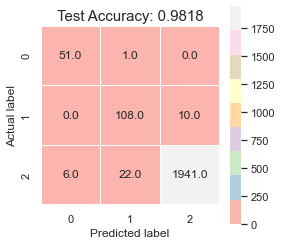

In [ ]:
train_c_matrix = confusion_matrix(y_test, test_y_pred)  # Compute the train confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(train_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

### Random Forests - Tuning the hyper-parameters

In [ ]:
# Constuct: Random Forest Classifier - tuning HP:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=6, random_state=3, min_samples_leaf = 5)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=5, random_state=3)

In [ ]:
# Predict test and train subsets:
train_y_pred = rf_clf.predict(X_train)
test_y_pred = rf_clf.predict(X_test)

In [ ]:
#Computing accuracy and generating test and train clasification reports
train_score = metrics.accuracy_score(y_train, train_y_pred) 
test_score = metrics.accuracy_score(y_test, test_y_pred) 
train_report = classification_report(y_train, train_y_pred) 
test_report = classification_report(y_test, test_y_pred) 
print('Random Forest Classifier Train Classification Report: \n\n', train_report,'\n\n')
print('Random Forest Classifier Test Classification Report: \n\n', test_report)

Random Forest Classifier Train Classification Report: 

               precision    recall  f1-score   support

           0       0.97      0.99      0.98       114
           1       0.83      0.98      0.90       250
           2       1.00      0.99      0.99      4626

    accuracy                           0.99      4990
   macro avg       0.93      0.99      0.96      4990
weighted avg       0.99      0.99      0.99      4990
 


Random Forest Classifier Test Classification Report: 

               precision    recall  f1-score   support

           0       0.89      0.94      0.92        52
           1       0.82      0.99      0.90       118
           2       1.00      0.99      0.99      1969

    accuracy                           0.98      2139
   macro avg       0.90      0.97      0.94      2139
weighted avg       0.99      0.98      0.99      2139



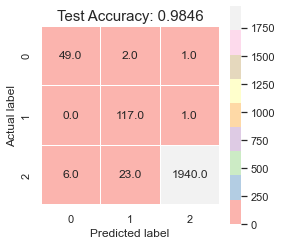

In [ ]:
train_c_matrix = confusion_matrix(y_test, test_y_pred)  # Compute the train confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(train_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

### Finding the most important features to use in classification :

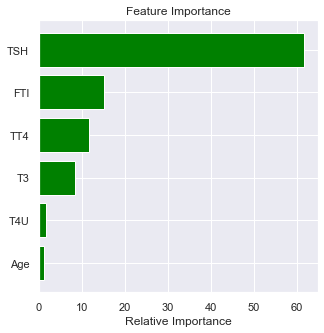

In [ ]:
#Finding the feature importance :
feature_importance = rf_clf.feature_importances_
feature_importance = 100.0*(feature_importance/np.sum(feature_importance))

sorted_idx = np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+0.5
plt.figure(figsize=(5, 5))
plt.title("Feature Importance")
plt.xlabel('Relative Importance')
plt.barh(pos, feature_importance[sorted_idx], color='green', align="center")
plt.yticks(pos,df2.columns[:-1][sorted_idx])
plt.show()

### Therefore the features "TSH", "FTI" and "TT4" are used for further classification algorithms

### Random Forest with only important features. 

In [ ]:
cont_features = ['TSH','T3','TT4','T4U','FTI','Age']
imp_features = ['TSH','FTI','TT4']
X = df2[imp_features]
y = df2['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2)

In [ ]:
# Constuct: Random Forest Classifier :
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=65, max_features=2, min_samples_leaf=3,min_samples_split=10, n_estimators=200, random_state=3)
rf_clf.fit(X_train, y_train) 

RandomForestClassifier(max_depth=65, max_features=2, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=200, random_state=3)

In [ ]:
# Predict test and train subsets:
train_y_pred = rf_clf.predict(X_train)
test_y_pred = rf_clf.predict(X_test)

In [ ]:
#Computing accuracy and generating test and train clasification reports
train_score = metrics.accuracy_score(y_train, train_y_pred) 
test_score = metrics.accuracy_score(y_test, test_y_pred) 
train_report = classification_report(y_train, train_y_pred) 
test_report = classification_report(y_test, test_y_pred) 
print('Random Forest Classifier Train Classification Report: \n\n', train_report,'\n\n')
print('Random Forest Classifier Test Classification Report: \n\n', test_report)

Random Forest Classifier Train Classification Report: 

               precision    recall  f1-score   support

           0       0.92      1.00      0.96       114
           1       0.84      0.99      0.91       250
           2       1.00      0.99      0.99      4626

    accuracy                           0.99      4990
   macro avg       0.92      0.99      0.95      4990
weighted avg       0.99      0.99      0.99      4990
 


Random Forest Classifier Test Classification Report: 

               precision    recall  f1-score   support

           0       0.90      1.00      0.95        52
           1       0.74      0.92      0.82       118
           2       0.99      0.98      0.99      1969

    accuracy                           0.98      2139
   macro avg       0.88      0.96      0.92      2139
weighted avg       0.98      0.98      0.98      2139



## LDA and QDA for Classification :

In [ ]:
# Loading 'LinearDiscriminantAnalysis' from 'discriminant_analysis' module
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_clf = LinearDiscriminantAnalysis() # Instantiating the lda classifier
lda_clf.fit(X_train, y_train) # Fitting the train data

LinearDiscriminantAnalysis()

In [ ]:
# Finding the predictions of the lda classifier for train and test subsets
lda_train_y_pred = lda_clf.predict(X_train)
lda_test_y_pred = lda_clf.predict(X_test)

In [ ]:
print("The predictions for LDA Classifier for test subset are:")
lda_test_y_pred

The predictions for LDA Classifier for test subset are:


array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [ ]:
# Loading 'QuadraticDiscriminantAnalysis' from 'discriminant_analysis' module
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda_clf = QuadraticDiscriminantAnalysis() # Instantiating the QDA classifier
qda_clf.fit(X_train, y_train) # Fitting the training data

QuadraticDiscriminantAnalysis()

In [ ]:
# Finding predictions of qda classifier for the train and test subsets
qda_train_y_pred = qda_clf.predict(X_train)
qda_test_y_pred = qda_clf.predict(X_test)

In [ ]:
print("The predictions for QDA Classifier for test subset are:")
qda_test_y_pred

The predictions for QDA Classifier for test subset are:


array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [ ]:
#LDA Classification_Report 

lda_train_score = metrics.accuracy_score(y_train, lda_train_y_pred) # Compute train accuracy
lda_test_score = metrics.accuracy_score(y_test, lda_test_y_pred) # Compute test accuracy
lda_train_report = classification_report(y_train, lda_train_y_pred) # Generate classification report for train data
lda_test_report = classification_report(y_test, lda_test_y_pred) # Generate classification report for test data
print('LDA Train Classification Report: \n\n', lda_train_report,'\n\n')
print('LDA Test Classification Report: \n\n', lda_test_report)

LDA Train Classification Report: 

               precision    recall  f1-score   support

           0       0.90      0.53      0.66       114
           1       0.00      0.00      0.00       250
           2       0.94      1.00      0.97      4626

    accuracy                           0.94      4990
   macro avg       0.61      0.51      0.54      4990
weighted avg       0.89      0.94      0.91      4990
 


LDA Test Classification Report: 

               precision    recall  f1-score   support

           0       0.82      0.54      0.65        52
           1       0.00      0.00      0.00       118
           2       0.93      1.00      0.96      1969

    accuracy                           0.93      2139
   macro avg       0.59      0.51      0.54      2139
weighted avg       0.88      0.93      0.90      2139



C:\Users\rapto\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rapto\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rapto\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rapto\anaconda3\lib\site-packages\sklearn\metr

In [ ]:
    # QDA Classification Report:

    qda_train_score = metrics.accuracy_score(y_train, qda_train_y_pred) # Compute train accuracy
    qda_test_score = metrics.accuracy_score(y_test, qda_test_y_pred) # Compute test accuracy
    qda_train_report = classification_report(y_train, qda_train_y_pred) # Generat classification report for train data
    qda_test_report = classification_report(y_test, qda_test_y_pred) # Generate classification report for test data
    print('QDA Train Classification Report: \n\n', qda_train_report,'\n\n')
    print('QDA Test Classification Report: \n\n', qda_test_report)

QDA Train Classification Report: 

               precision    recall  f1-score   support

           0       0.89      0.75      0.82       114
           1       0.59      0.24      0.34       250
           2       0.96      0.99      0.98      4626

    accuracy                           0.95      4990
   macro avg       0.81      0.66      0.71      4990
weighted avg       0.94      0.95      0.94      4990
 


QDA Test Classification Report: 

               precision    recall  f1-score   support

           0       0.76      0.75      0.76        52
           1       0.58      0.32      0.42       118
           2       0.96      0.99      0.97      1969

    accuracy                           0.94      2139
   macro avg       0.77      0.69      0.72      2139
weighted avg       0.93      0.94      0.94      2139



### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression   

logreg = LogisticRegression(penalty = 'none', max_iter = 10000) 

logreg.fit(X_train, y_train) 

LogisticRegression(max_iter=10000, penalty='none')

In [ ]:
# Predict probabilities for first 10 instances in train and test subsets :

y_train_pred_prob = logreg.predict_proba(X_train)  
y_test_pred_prob = logreg.predict_proba(X_test)    
print('Train predictions for probabilities:\n\n', y_train_pred_prob[:10],'\n')
print('Test predictions for probabilities:\n\n', y_test_pred_prob[:10])

Train predictions for probabilities:

 [[3.23849293e-05 2.23976045e-02 9.77570011e-01]
 [6.77345222e-04 3.70726329e-02 9.62250022e-01]
 [1.28894749e-04 2.46287220e-02 9.75242383e-01]
 [2.83996996e-04 2.77747985e-02 9.71941205e-01]
 [1.43675265e-06 1.20503843e-02 9.87948179e-01]
 [4.85412725e-04 4.58675547e-02 9.53647033e-01]
 [5.87944827e-04 3.02172469e-02 9.69194808e-01]
 [9.21538618e-04 3.27578341e-02 9.66320627e-01]
 [7.47433296e-05 3.21685638e-02 9.67756693e-01]
 [1.85090904e-05 1.76209570e-02 9.82360534e-01]] 

Test predictions for probabilities:

 [[6.07787094e-04 2.52536919e-02 9.74138521e-01]
 [4.38524453e-05 1.56698850e-02 9.84286263e-01]
 [3.70663093e-05 1.78668660e-02 9.82096068e-01]
 [3.43975508e-06 6.95257232e-03 9.93043988e-01]
 [1.10473589e-05 1.49852398e-02 9.85003713e-01]
 [1.39286097e-04 1.49770748e-02 9.84883639e-01]
 [2.85149940e-03 5.28605627e-01 4.68542873e-01]
 [1.15913563e-06 1.01227662e-02 9.89876075e-01]
 [1.80362841e-27 1.05642377e-04 9.99894358e-01]
 [2.0930

In [ ]:
y_train_pred = y_train_pred_prob.argmax(axis=1)  
y_test_pred = y_test_pred_prob.argmax(axis=1)  
print('Predicted class for train: ', y_train_pred[:10],'\n')     
print('Predicted class for test: ', y_test_pred[:10])


Predicted class for train:  [2 2 2 2 2 2 2 2 2 2] 

Predicted class for test:  [2 2 2 2 2 2 1 2 2 2]


In [ ]:
# Calculating accuracy of model

from sklearn import metrics  

train_score = metrics.accuracy_score(y_train, y_train_pred) 

test_score = metrics.accuracy_score(y_test, y_test_pred)   

print('Train accuracy score of the model is ', round(train_score, 5),'\n')
print('Test accuracy score of the model is ', round(test_score, 5))

Train accuracy score of the model is  0.9503 

Test accuracy score of the model is  0.94203


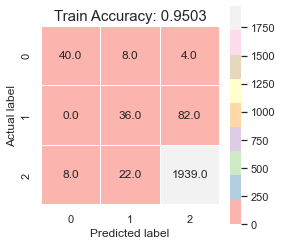

Classification Report for the Test Subset: 

               precision    recall  f1-score   support

           0       0.83      0.77      0.80        52
           1       0.55      0.31      0.39       118
           2       0.96      0.98      0.97      1969

    accuracy                           0.94      2139
   macro avg       0.78      0.69      0.72      2139
weighted avg       0.93      0.94      0.93      2139



In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report

train_c_matrix = confusion_matrix(y_test, y_test_pred)  # Compute the train confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(train_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Train Accuracy: {0}'.format(round(train_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

# Classification Report

print('Classification Report for the Test Subset: \n\n', classification_report(y_test, y_test_pred))

## SVC and SVM for Classification.
### SVM with default parameters

In [ ]:
from sklearn import svm # Importing 'svm' module from 'sklearn'

linear_svc = svm.SVC(kernel='poly', gamma='auto', C=0.01)
linear_svc.fit(X_train, y_train) 

SVC(C=0.01, gamma='auto', kernel='poly')

In [ ]:
 y_pred = linear_svc.predict(X_test) 

In [ ]:

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
score = metrics.accuracy_score(y_test, y_pred)
print('Test accuracy score of the model is ', round(score, 5))

Test accuracy score of the model is  0.92052


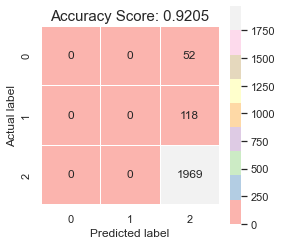

In [ ]:
# Confusion matrix
svc_c_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(svc_c_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

In [ ]:
# Classification Report
print('Test Classification Report: \n\n', classification_report(y_test, y_pred))

Test Classification Report: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.00      0.00      0.00       118
           2       0.92      1.00      0.96      1969

    accuracy                           0.92      2139
   macro avg       0.31      0.33      0.32      2139
weighted avg       0.85      0.92      0.88      2139



C:\Users\rapto\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rapto\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rapto\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Here, the output for thos model is '0'because of which we implemented SVM with kernel

### SVM with kernel :

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm
def svm_clf(X_tr, X_ts, y_tr, y_ts, ker, C, gamma='auto', r=0, deg=1):
    clf = svm.SVC(kernel=ker, gamma=gamma, C=C, coef0=r, degree=deg)
    clf.fit(X_tr, y_tr) 
    y_tr_pred = clf.predict(X_tr)
    y_ts_pred = clf.predict(X_ts) 
    tr_score = metrics.accuracy_score(y_tr, y_tr_pred) 
    ts_score = metrics.accuracy_score(y_ts, y_ts_pred) 
    tr_report = classification_report(y_tr, y_tr_pred) 
    ts_report = classification_report(y_ts, y_ts_pred) 
    print('Train Classification Report: \n\n', tr_report,'\n\n')
    print('Test Classification Report: \n\n', ts_report)
    return

In [ ]:
# Apply linear SVM - Low budget for margin violation
svm_clf(X_train, X_test, y_train, y_test, ker='linear', C=0.01)

Train Classification Report: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       114
           1       0.00      0.00      0.00       250
           2       0.93      1.00      0.96      4626

    accuracy                           0.93      4990
   macro avg       0.31      0.33      0.32      4990
weighted avg       0.86      0.93      0.89      4990
 


Test Classification Report: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.00      0.00      0.00       118
           2       0.92      1.00      0.96      1969

    accuracy                           0.92      2139
   macro avg       0.31      0.33      0.32      2139
weighted avg       0.85      0.92      0.88      2139



C:\Users\rapto\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rapto\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rapto\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rapto\anaconda3\lib\site-packages\sklearn\metr

In [ ]:
# Apply radial SVM : high budget for margin violation
svm_clf(X_train, X_test, y_train, y_test, ker='rbf', C=10)

Train Classification Report: 

               precision    recall  f1-score   support

           0       0.92      0.60      0.72       114
           1       0.00      0.00      0.00       250
           2       0.94      1.00      0.97      4626

    accuracy                           0.94      4990
   macro avg       0.62      0.53      0.56      4990
weighted avg       0.89      0.94      0.91      4990
 


Test Classification Report: 

               precision    recall  f1-score   support

           0       0.91      0.62      0.74        52
           1       0.00      0.00      0.00       118
           2       0.93      1.00      0.97      1969

    accuracy                           0.93      2139
   macro avg       0.62      0.54      0.57      2139
weighted avg       0.88      0.93      0.91      2139



C:\Users\rapto\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rapto\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rapto\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rapto\anaconda3\lib\site-packages\sklearn\metr

In [ ]:
# Apply polynomial SVM (with degree 3 and r=1) : very low budget for margin violation
svm_clf(X_train, X_test, y_train, y_test, ker='poly', C=0.001, r=1, deg=3)

Train Classification Report: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       114
           1       0.00      0.00      0.00       250
           2       0.93      1.00      0.96      4626

    accuracy                           0.93      4990
   macro avg       0.31      0.33      0.32      4990
weighted avg       0.86      0.93      0.89      4990
 


Test Classification Report: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.00      0.00      0.00       118
           2       0.92      1.00      0.96      1969

    accuracy                           0.92      2139
   macro avg       0.31      0.33      0.32      2139
weighted avg       0.85      0.92      0.88      2139



C:\Users\rapto\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rapto\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rapto\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rapto\anaconda3\lib\site-packages\sklearn\metr

##### It can be observed that even with all the improvements that we tried making to this model, the minority classes are still not being able to be classified properly. After analysis we can understand that SVM works better only for 2 class classification - without proper hyper-parameter tuning.

## Using GridSearchCV to find best fit models hyper-parameters 

In [ ]:
# Importing 'GridSearchCV' from 'sklearn'

from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100],'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'gamma':['scale', 'auto'], 'kernel': ['linear', 'rbf']}

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3, n_jobs=-1)

grid.fit(X_train, y_train)
print('\n Best choices for hyperparameters:\n', grid.best_params_) 
grid_predictions = grid.predict(X_test) 
print('\n Test Classification Report:\n\n', classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 20 candidates, totalling 100 fits

 Best choices for hyperparameters:
 {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

 Test Classification Report:

               precision    recall  f1-score   support

           0       0.89      0.92      0.91        52
           1       0.76      0.64      0.70       118
           2       0.98      0.99      0.98      1969

    accuracy                           0.96      2139
   macro avg       0.88      0.85      0.86      2139
weighted avg       0.96      0.96      0.96      2139



## Using Grid search result parameters for SVM Classifier

In [ ]:
#SVM Classifier after GRID Search :
svm_clf(X_train, X_test, y_train, y_test, ker='rbf', C=100, r=1, deg=3, gamma = 'scale')

Train Classification Report: 

               precision    recall  f1-score   support

           0       0.94      0.93      0.93       114
           1       0.78      0.62      0.69       250
           2       0.98      0.99      0.98      4626

    accuracy                           0.97      4990
   macro avg       0.90      0.85      0.87      4990
weighted avg       0.97      0.97      0.97      4990
 


Test Classification Report: 

               precision    recall  f1-score   support

           0       0.89      0.92      0.91        52
           1       0.76      0.64      0.70       118
           2       0.98      0.99      0.98      1969

    accuracy                           0.96      2139
   macro avg       0.88      0.85      0.86      2139
weighted avg       0.96      0.96      0.96      2139



##### Interestingly, Grid Search has worked wonders in finding the best features to evaluate and we can observe that there has been a drastic improvement in the results regarding the minority class as well.

## Gradient Boosting Classifier 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=3)

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=30, learning_rate=0.1,max_depth=4, random_state=2)
#gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=4, n_estimators=30, random_state=2)

In [ ]:

train_y_pred = gb_clf.predict(X_train)
test_y_pred = gb_clf.predict(X_test)

In [ ]:
train_score = metrics.accuracy_score(y_train, train_y_pred)
test_score = metrics.accuracy_score(y_test, test_y_pred) 
train_report = classification_report(y_train, train_y_pred) 
test_report = classification_report(y_test, test_y_pred) 
print('Gradient Boost Classifier Train Classification Report: \n\n', train_report,'\n\n')
print('Gradient Boost Classifier Test Classification Report: \n\n', test_report)

Gradient Boost Classifier Train Classification Report: 

               precision    recall  f1-score   support

           0       0.97      1.00      0.98       114
           1       0.81      1.00      0.90       245
           2       1.00      0.99      0.99      4274

    accuracy                           0.99      4633
   macro avg       0.93      1.00      0.96      4633
weighted avg       0.99      0.99      0.99      4633
 


Gradient Boost Classifier Test Classification Report: 

               precision    recall  f1-score   support

           0       0.93      0.98      0.95        52
           1       0.74      0.90      0.81       123
           2       0.99      0.98      0.99      2321

    accuracy                           0.98      2496
   macro avg       0.89      0.95      0.92      2496
weighted avg       0.98      0.98      0.98      2496



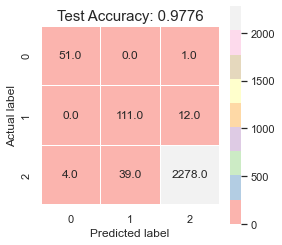

In [ ]:
train_c_matrix = confusion_matrix(y_test, test_y_pred)  # Compute the train confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(train_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

## Decision Tree Classifier
### Decision tree with default parameters:|

In [ ]:
from sklearn import tree # Importing 'tree' module from sklearn
tr_clf = tree.DecisionTreeClassifier()
tr_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
train_y_pred = tr_clf.predict(X_train)
test_y_pred = tr_clf.predict(X_test)

In [ ]:
train_score = metrics.accuracy_score(y_train, train_y_pred) # Compute train␣ , →accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred) # Compute test␣ , →accuracy
train_report = classification_report(y_train, train_y_pred) # Generate␣ , →classification report for train data
test_report = classification_report(y_test, test_y_pred) # Generate␣ , →classification report for test data
print('Decision Tree Train Classification Report: \n\n', train_report,'\n\n')
print('Decision Tree Test Classification Report: \n\n', test_report)

Decision Tree Train Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00       245
           2       1.00      1.00      1.00      4274

    accuracy                           1.00      4633
   macro avg       1.00      1.00      1.00      4633
weighted avg       1.00      1.00      1.00      4633
 


Decision Tree Test Classification Report: 

               precision    recall  f1-score   support

           0       0.92      0.94      0.93        52
           1       0.74      0.67      0.71       123
           2       0.98      0.99      0.98      2321

    accuracy                           0.97      2496
   macro avg       0.88      0.87      0.87      2496
weighted avg       0.97      0.97      0.97      2496



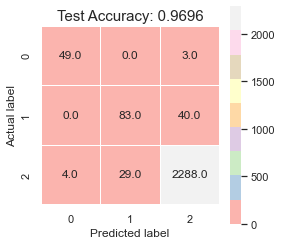

In [ ]:
train_c_matrix = confusion_matrix(y_test, test_y_pred)  # Compute the train confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(train_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

### Using GridSearchCV to find hyperparameters for ideal fitting Decision tree

In [ ]:
# Using GridSearchCV to figure out the best values of the tree hyperparameters
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(tree.DecisionTreeClassifier(random_state=3),params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)
# Displaying the best hyperparameters from 'params'
grid_search_cv.best_estimator_

Fitting 3 folds for each of 294 candidates, totalling 882 fits


DecisionTreeClassifier(max_leaf_nodes=7, random_state=3)

In [ ]:
 # Retraining the tree classifier (this time with best hyperparameters found␣ , →above)
tr_clf = tree.DecisionTreeClassifier(max_leaf_nodes=7, random_state=3)
tr_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=7, random_state=3)

In [ ]:
# Finding the predictions of tree classifier for train and test subsets
train_y_pred = tr_clf.predict(X_train)
test_y_pred = tr_clf.predict(X_test)

In [ ]:
train_score = metrics.accuracy_score(y_train, train_y_pred) # Compute train␣ , →accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred) # Compute test␣ , →accuracy
train_report = classification_report(y_train, train_y_pred) # Generate␣ , →classification report for train data
test_report = classification_report(y_test, test_y_pred) # Generate␣ , →classification report for test data
print('Decision Tree Train Classification Report: \n\n', train_report,'\n\n')
print('Decision Tree Test Classification Report: \n\n', test_report)

Decision Tree Train Classification Report: 

               precision    recall  f1-score   support

           0       0.91      1.00      0.95       114
           1       0.77      1.00      0.87       245
           2       1.00      0.98      0.99      4274

    accuracy                           0.98      4633
   macro avg       0.89      0.99      0.94      4633
weighted avg       0.99      0.98      0.98      4633
 


Decision Tree Test Classification Report: 

               precision    recall  f1-score   support

           0       0.91      1.00      0.95        52
           1       0.74      0.96      0.83       123
           2       1.00      0.98      0.99      2321

    accuracy                           0.98      2496
   macro avg       0.88      0.98      0.93      2496
weighted avg       0.98      0.98      0.98      2496



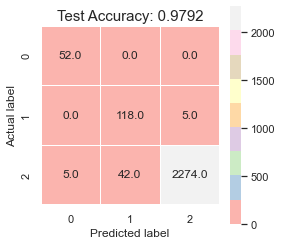

In [ ]:
train_c_matrix = confusion_matrix(y_test, test_y_pred)  # Compute the train confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(train_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

##### Using GridSearch and tuning the hyper-parameters, we are able to generate a model with minimal variance and higher accuracy, specifically in case of the minority class.

## Bagged Decision Tree Classifier

In [ ]:
# Constructing a bagged-tree classifier

from sklearn.ensemble import BaggingClassifier

#bag_clf = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(), n_estimators=18, random_state=3).95
bag_clf = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier())
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [ ]:
# Finding the predictions of the bagged-tree classifier for train and test subsets

train_y_pred = bag_clf.predict(X_train)
test_y_pred = bag_clf.predict(X_test)

In [ ]:
train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('Bagged Trees Classifier Train Classification Report: \n\n', train_report,'\n\n')
print('Bagged Trees Classifier Test Classification Report: \n\n', test_report)

Bagged Trees Classifier Train Classification Report: 

               precision    recall  f1-score   support

           0       1.00      0.99      1.00       114
           1       0.98      1.00      0.99       245
           2       1.00      1.00      1.00      4274

    accuracy                           1.00      4633
   macro avg       0.99      1.00      0.99      4633
weighted avg       1.00      1.00      1.00      4633
 


Bagged Trees Classifier Test Classification Report: 

               precision    recall  f1-score   support

           0       0.92      0.92      0.92        52
           1       0.74      0.89      0.81       123
           2       0.99      0.98      0.99      2321

    accuracy                           0.98      2496
   macro avg       0.88      0.93      0.91      2496
weighted avg       0.98      0.98      0.98      2496



### Bagged SVC Classifier

In [ ]:
# We start by training an SVC

from sklearn.svm import SVC

svc_clf = SVC()
svc_clf.fit(X_train, y_train)

SVC()

In [ ]:
# Finding the predictions of SVC classifier for train and test subsets

train_y_pred = svc_clf.predict(X_train)
test_y_pred = svc_clf.predict(X_test)

In [ ]:
train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('SVC Classifier Train Classification Report: \n\n', train_report,'\n\n')
print('SVC Classifier Test Classification Report: \n\n', test_report)

SVC Classifier Train Classification Report: 

               precision    recall  f1-score   support

           0       0.92      0.86      0.89       114
           1       0.72      0.24      0.36       245
           2       0.96      0.99      0.97      4274

    accuracy                           0.95      4633
   macro avg       0.86      0.70      0.74      4633
weighted avg       0.94      0.95      0.94      4633
 


SVC Classifier Test Classification Report: 

               precision    recall  f1-score   support

           0       0.91      0.83      0.87        52
           1       0.62      0.17      0.27       123
           2       0.95      0.99      0.97      2321

    accuracy                           0.95      2496
   macro avg       0.83      0.66      0.70      2496
weighted avg       0.94      0.95      0.94      2496



In [ ]:
 #Bagged-SVC classifier
bag_clf = BaggingClassifier(base_estimator=SVC())
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC())

In [ ]:
# Finding the predictions of the bagged-SVC classifier for train and test subsets

train_y_pred = bag_clf.predict(X_train)
test_y_pred = bag_clf.predict(X_test)

In [ ]:
train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('Bagged SVC Classifier Train Classification Report: \n\n', train_report,'\n\n')
print('Bagged SVC Classifier Test Classification Report: \n\n', test_report)

Bagged SVC Classifier Train Classification Report: 

               precision    recall  f1-score   support

           0       0.92      0.88      0.90       114
           1       0.71      0.25      0.37       245
           2       0.96      0.99      0.97      4274

    accuracy                           0.95      4633
   macro avg       0.86      0.71      0.75      4633
weighted avg       0.94      0.95      0.94      4633
 


Bagged SVC Classifier Test Classification Report: 

               precision    recall  f1-score   support

           0       0.92      0.85      0.88        52
           1       0.62      0.17      0.27       123
           2       0.95      0.99      0.97      2321

    accuracy                           0.95      2496
   macro avg       0.83      0.67      0.71      2496
weighted avg       0.94      0.95      0.94      2496



### We can see hardly 2 or 3 % upgrade in the f1-score. using bagged SVC classifier, the f-1 score of the minority class is still very low. Bagged SVC performance is below par

## Adaboost classifier

In [ ]:
# Importing AdaBoostClassifier from ensemble module

from sklearn.ensemble import AdaBoostClassifier

# Instantiating the AdaBoostClassifier with 500 sequential trees

adab_clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_leaf_nodes=10), n_estimators=500, learning_rate=1.5, random_state=0) 
#adab_clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier())
adab_clf.fit(X_train, y_train)   # Fitting the train data

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_leaf_nodes=10),
                   learning_rate=1.5, n_estimators=500, random_state=0)

In [ ]:
# Finding the predictions of the adaboost classifier for train and test subsets

train_y_pred = adab_clf.predict(X_train)
test_y_pred = adab_clf.predict(X_test)

In [ ]:
train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('AdaBoost Classifier Train Classification Report: \n\n', train_report,'\n\n')
print('AdaBoost Classifier Test Classification Report: \n\n', test_report)

AdaBoost Classifier Train Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       0.94      0.92      0.93       245
           2       1.00      1.00      1.00      4274

    accuracy                           0.99      4633
   macro avg       0.98      0.97      0.97      4633
weighted avg       0.99      0.99      0.99      4633
 


AdaBoost Classifier Test Classification Report: 

               precision    recall  f1-score   support

           0       0.92      0.90      0.91        52
           1       0.73      0.72      0.72       123
           2       0.98      0.98      0.98      2321

    accuracy                           0.97      2496
   macro avg       0.88      0.87      0.87      2496
weighted avg       0.97      0.97      0.97      2496



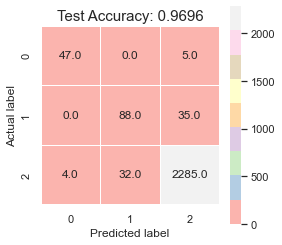

In [ ]:
train_c_matrix = confusion_matrix(y_test, test_y_pred)  # Compute the train confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(train_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

##### High variance can be seen between the test and train results

##### Among all the classification algorithms that we used, Random Forest Classifier worked best and research also states that this algorithm is the best fit for diagnosing patients in real-time as well.

# REPORT : Analysis and Learning:

#### Understanding of Data:

1) Data is sourced from keel machine learning repository.

2) The dataset has a total of 7200 instances.

3) There are 21 features totally.

4) Out of 21, 6 are continuous variables.

5) Remaining 15 variables are categorical in nature.

#### EDA and data pre-processing.
1) First we checked for null values, there are no null values in the dataset.

2) Next, we checked for duplicated values. There are total of 71 duplicated columns.

3) The duplicated rows are dropped from the data-frame. We are left with 7129 instances now.

4) The data_types of features are checked. "Age" is on a scale from 0 to 1. It is convereted to integer scale.

5) The number of instances of each class is analyzed. 

6) The classes are labelled as 1,2,3 & by using Label encoding, we convert them to 0,1,2 for classification. 

#### Balanced or unbalanced classification ?

The number of samples with Hyper-thyroidism = 166 

The number of samples with Hypo-thyroidism = 368 

The number of samples with Negative case of Thyroidism = 6595

Therefore the number of instances of the minority classes are much lesser than that of the majority class (almost 1:2:40 Proportion.

#### Therefore the problem is very close to being a highly unbalanced classification.

#### Tackling Unbalanced issue ?

Balancing techniques are not applied here as the data in a real worl application is naturally highly unbalanced. 

Therefore, through this problem we seek to find the best algorithm that can generate the highest accuracy, while dealing with the highly unbalanced case. 


#### Problem 1: Regression

Target Audience / Beneficiary: Medical testing facilities & labs.

Aim : Find the missing values in medical report 
        
Target Variable : To find the value of TT4 (Total thyroxine) by using other variables such asT3, T4 and TSH.

Benefits :  
    Validating the existing medical data to check for possible errors or outliers in medical reports. 
    Use of regression to predict and generate the total thyroxine level in blood using the other variables


#### Solution : Problem -1 Regression. 

Correlation : Identification of the Input features for the regression problem:

The values of FTI, T3 and T4U have high correlation with TT4 (Total Thyroxine Values)
Therefore are selected as input variables for regression analysis.


#### primary meteric for evaluation of best regression model - R^2 Value for test dataset.

#### Linear Regression : 
R^2 score for test dataset =  0.9179 

#### Decision Tree Regressor :
R^2 score for test dataset =  0.9589 

#### Bagging Regressor : 

R^2 score for train dataset =  0.9968 

R^2 score for test dataset =  0.9819 

#### Random Forest Regressor:

R^2 score for train dataset =  0.997 

R^2 score for test dataset =  0.9825 










For the Regression algorithms, Random forest regressor and Bagging regressor both have almost identical R^2 scores, therefore are best algorithms. 

The regression problem is solved with a very high accuracy rate .

#### Problem 2 : Classification Algorithm 

Target Audience / Beneficiary: End users - Patients

Aim : To use classification algorithms for Classify  the patients into 3 classes based on the thyroid medical data set.

Target Classes:

“0” - Hyperthyroidism : Hyperthyroidism is an overactive thyroid (when it produces too much thyroid hormone).

“1” - HypoThyroidism : Hypothyroidism is an underactive thyroid (when it does not produce enough). Almost 4.6% of US population is suffering from it.

“2” - Negative.








#### Solution: Problem - 2 Classification. 

#### Primary metric considered for comparing the model performances : f-1 score of the minority classes. 

#### Best Performing Algorithm: Random Forest Classifier with tuned hyperparameters. 

The random forest algorithm initially resulted in an f-1 score of .86 for the minority class '1' in the test instance, and 1.0 for the train instance. 

However, after tuning hyper-parameters the variance was eliminated and the f-1 score of the worst performing minority class was increased to .90 for both test and train instances.

#### Next best performing algorithm : Decision tree classifier with parameters from GridSearchCV:

Initially, the default parameters of decision trees causes a high variance problem with over-fitting. The f-1 scores of train and test for minority class "1" is 1.0 and 0.71 respectively.

This problem was solved with GridSearchCV and passing the resultant parameters.

This was able to improve performance and greatly decrease the high variance problem:

The f-1 scores of train and test for minority class are now .87 and .83


#### Analyzing the Performance of SVM

First one we used was SVM with default parameters. Resulted in an f-1 score of 0,0 for the two minority classes. 

Then, implementing Kernel SVM - resulted in f1 score of 74 for the first minority class (o). 
However, minority class (1) still had f-1 score 0.

Then used Scikit-learn’s GridSearchCV. 

Grid search was able to improve the score of the second minority class from zero to 70 !

That too with minimal variance. 


However, as the continuous variables (thyroid hormones and indexes) impact varies from individual to individual patient, there is an overlap of feartures.

Therefore, as SVM is a geometric based algorithm, The hyperplane fails to accurately divide the features for classification. Hence, SVM fails to achive an f-1 score that competes with Random Forests. 




#### Analyzing the Performance of probability based models:

All probablilty based models including logistic regression, LDA, QDA and Gaussian Naive Bayes show very poor f-1 scores for the minority class, sometimes tends to zero. 

The major reason behind this could be the highly imbalanced data and few instances of the minority classes.

As probabiliy based algorithms require combination of input features for the various outputs, there are not enough isntances in the train subset of the model.

Additionally, the assumptions of Naive Bayes about the independance of the feature variables does not hold true.

Therefore the above mentioned models do not perform well.

#### Analysis : Why Random Forest Performed Best ?

Random forests, with tuning the hyper-parameters shows the greatest improvement in the result.
Accuracy of 90% and 90% for the minority classes - eliminating any variance 
Overall accuracy of the model stands at 98.5% 

1) Random forests use the Collective outcome of multiple decision trees. 

2) Prevention of overfit for better model performance. 

3) Great with higher dimensional data, here we use all 6 features. 

4) Ability to handle outliers - binning and reducing error - by downsampling majority class and growing trees on balanced dataset 

#### Analyzing why an accuracy of over 90% is not possible realistically.

1) We are using a Highly unbalanced dataset

2) 40:2:1 approximate proportion of classes, Only 166 instances of minority class out of 7200 rows of data.

3) There is Overlap of data as the input features are biological levels of hormones - not everybody reacts same 

4) External factors that affect the functioning of a normal thyroid gland, Effect of this is highly variable for individuals based on: Sickness, Pregnancy,Infections,Goitre,Any tumors, Medication- Steroids and immunosuppressants, Medical conditions with other glands. 



#### Learning and Reccomendations:

1) Grid search is an amazing tool, use it. Saves time and prevents monotony. 

2) Choose algorithms based on the data you use.

3) Try solving the problem with the simplest algorithms and gradually increase complexity. Prioritize the concept of Occams Razor.

4) What to consider when selecting the best model ? performance evaluation metrics and Also consider how important the accuracy is, what difference does an improvement of 0.1% make ? 

5) In our case, we chose a bio-informatics problem, therefore an accuracy improvement of even 0.1% will result in accurace classification of 10 patients in a dataset of 10,000 cases. 

6) Therefore the requirement of the  computqational resources are not considered when chosing the best model in our case.

7) Specifically in-case of highly imbalanced classification problems, consider the minority classes.

8) In Highly imbalanced case - overall accuracy has very less weightage compared to the individual accuracies of the minority classes. For instance, LDA was able to achive an overall accuracy of 94% but it is of no use as the f-1 score for minority class '1' is ZERO !|




#### Code & Algorithm References :
Class Lecture Notes and notebooks. Lecture 1 - Lecture 13